In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings


%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(file_path, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [3]:
Z = df[["CPU_frequency", "Screen_Size_inch", "Weight_pounds", "Price"]]
print(Z.head())

   CPU_frequency  Screen_Size_inch  Weight_pounds  Price
0       0.551724              14.0        3.52800    978
1       0.689655              15.6        4.85100    634
2       0.931034              15.6        4.85100    946
3       0.551724              13.3        2.69010   1244
4       0.620690              15.6        4.21155    837


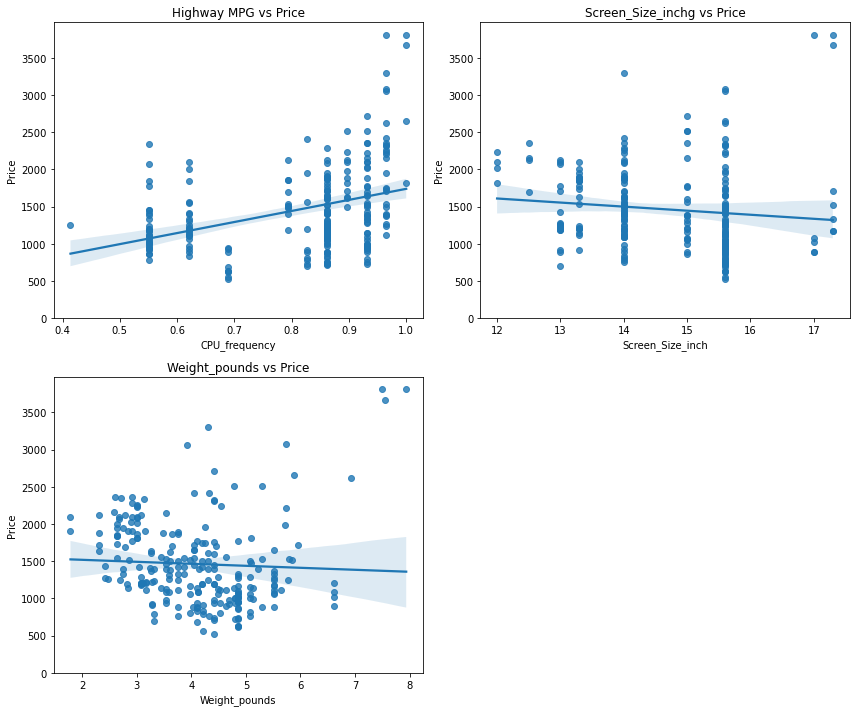

In [5]:
#  Regression plots
width = 12
height = 10
plt.figure(figsize=(width, height))

# Subplot 1: Highway MPG vs Price
plt.subplot(2, 2, 1)
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
plt.title("Highway MPG vs Price")

# Subplot 2: Screen_Size_inch vs Price
plt.subplot(2, 2, 2)
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)
plt.title("Screen_Size_inchg vs Price")

# Subplot 3: Weight_pounds vs Price
plt.subplot(2, 2, 3)
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)
plt.title("Weight_pounds vs Price")

# Adjust layout to prevent overlap
plt.tight_layout()

# Display plot
plt.show()

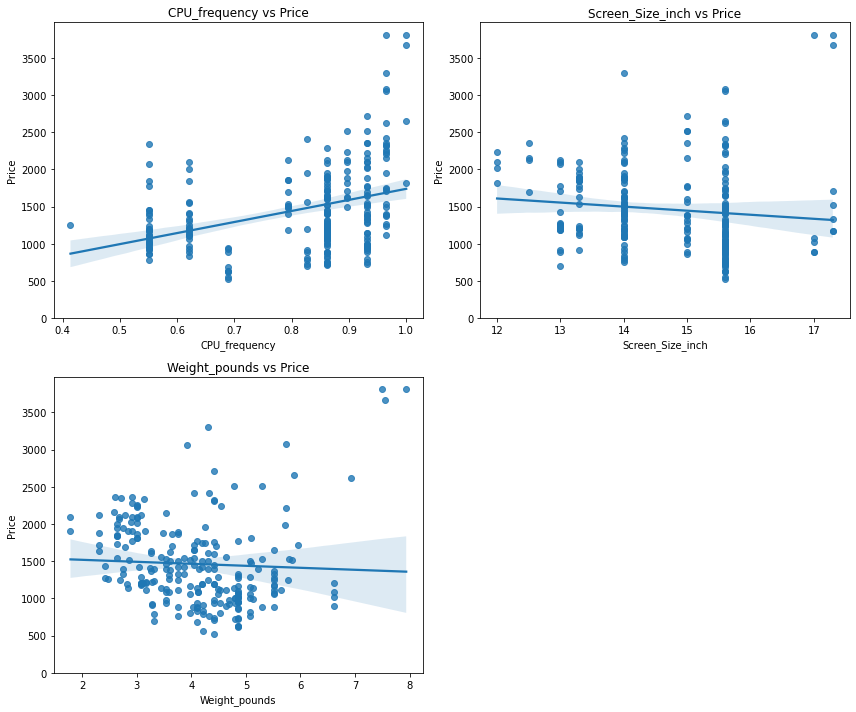

In [6]:
# Define the list of variables to plot against 'Price'
# Assuming 'Price' is the dependent variable
variables = ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]

# Set up the figure with a specified size
plt.figure(figsize=(12, 10))

# Loop through the variables to create a subplot for each one
# Start enumeration at 1 for subplot indexing
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)  # Arrange plots in 2 rows and 2 columns
    sns.regplot(x=var, y="Price", data=df)
    plt.ylim(0,)  # Set the lower y-limit to 0
    plt.title(f'{var} vs Price')

# Adjust layout to prevent overlap of plots
plt.tight_layout()

# Show the complete figure with all subplots
plt.show()

In [8]:
# variables = ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]

for param in variables:
    print(f"Correlation of Price and {param} is", df[[param, "Price"]].corr() )

Correlation of Price and CPU_frequency is                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000
